# Project - Classification - Titanic

The goal is to predict whether or not a passenger survived based on attributes such as their age, sex, passenger class, where they embarked and so on.




#### Downloaded the data (train.csv and test.csv files) from Kaggle and then upload them on your Colab or put into the same directory on your computer. Then use the first code block below to read them.
- To download the files, login to [Kaggle](https://www.kaggle.com/) and go to the [Titanic challenge](https://www.kaggle.com/c/titanic)


Read the train and test data from the csv files:

In [83]:
import pandas as pd

train_csv_path = "train.csv"
test_csv_path = "test.csv"

train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)



0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64


#### The attributes and their meaning are as follows:
- Survived: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
- Pclass: passenger class.
- Name, Sex, Age: self-explanatory
- SibSp: how many siblings & spouses of the passenger aboard the Titanic.
- Parch: how many children & parents of the passenger aboard the Titanic.
- Ticket: ticket id
- Fare: price paid (in pounds)
- Cabin: passenger's cabin number
- Embarked: where the passenger embarked the Titanic


### Use head, tail, info, describe methods to get insights about the data

In [2]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Note that 'Survided' column is missing in the test data.

----------------------------------------

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Insights:
- Most of the Cabin column is null
- 177 (891-714) rows for age is missing
- 2 of embarked column data is missing

--------------------------------------------------


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Insigths:
- Train data size: 891; test data size: 418
- Age ranges between 0.42 to 80 for the train data and between 0.17 to 76 for test data
- Fare ranges between 0 to 512
- etc.
---------------------------------------------

### Review the responses to the	value_counts() method:
-------------------------------------

In [8]:
train_data.Survived.value_counts() # make sure that survided has 0 and 1 values and see how many we have for each

0    549
1    342
Name: Survived, dtype: int64

In [9]:
train_data.Pclass.value_counts() # see the passenger classes we have and see how many we have for each

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
train_data.Sex.value_counts() # make sure we have male/female values and see how many we have for each

male      577
female    314
Name: Sex, dtype: int64

In [11]:
train_data.Embarked.value_counts() # see the unique values and see how many we have for each

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
train_data.Parch.value_counts() # see the parent children values and its distribution

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [13]:
train_data.SibSp.value_counts() # see the parent children values and its distribution

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

### Prepare a DataFrame that contains the following numeric fields: Survided, Sex, Age, SibSp, Parch, Fare. Plot these numeric fields on a histogram to get more insights
-------------------------------------

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >]], dtype=object)

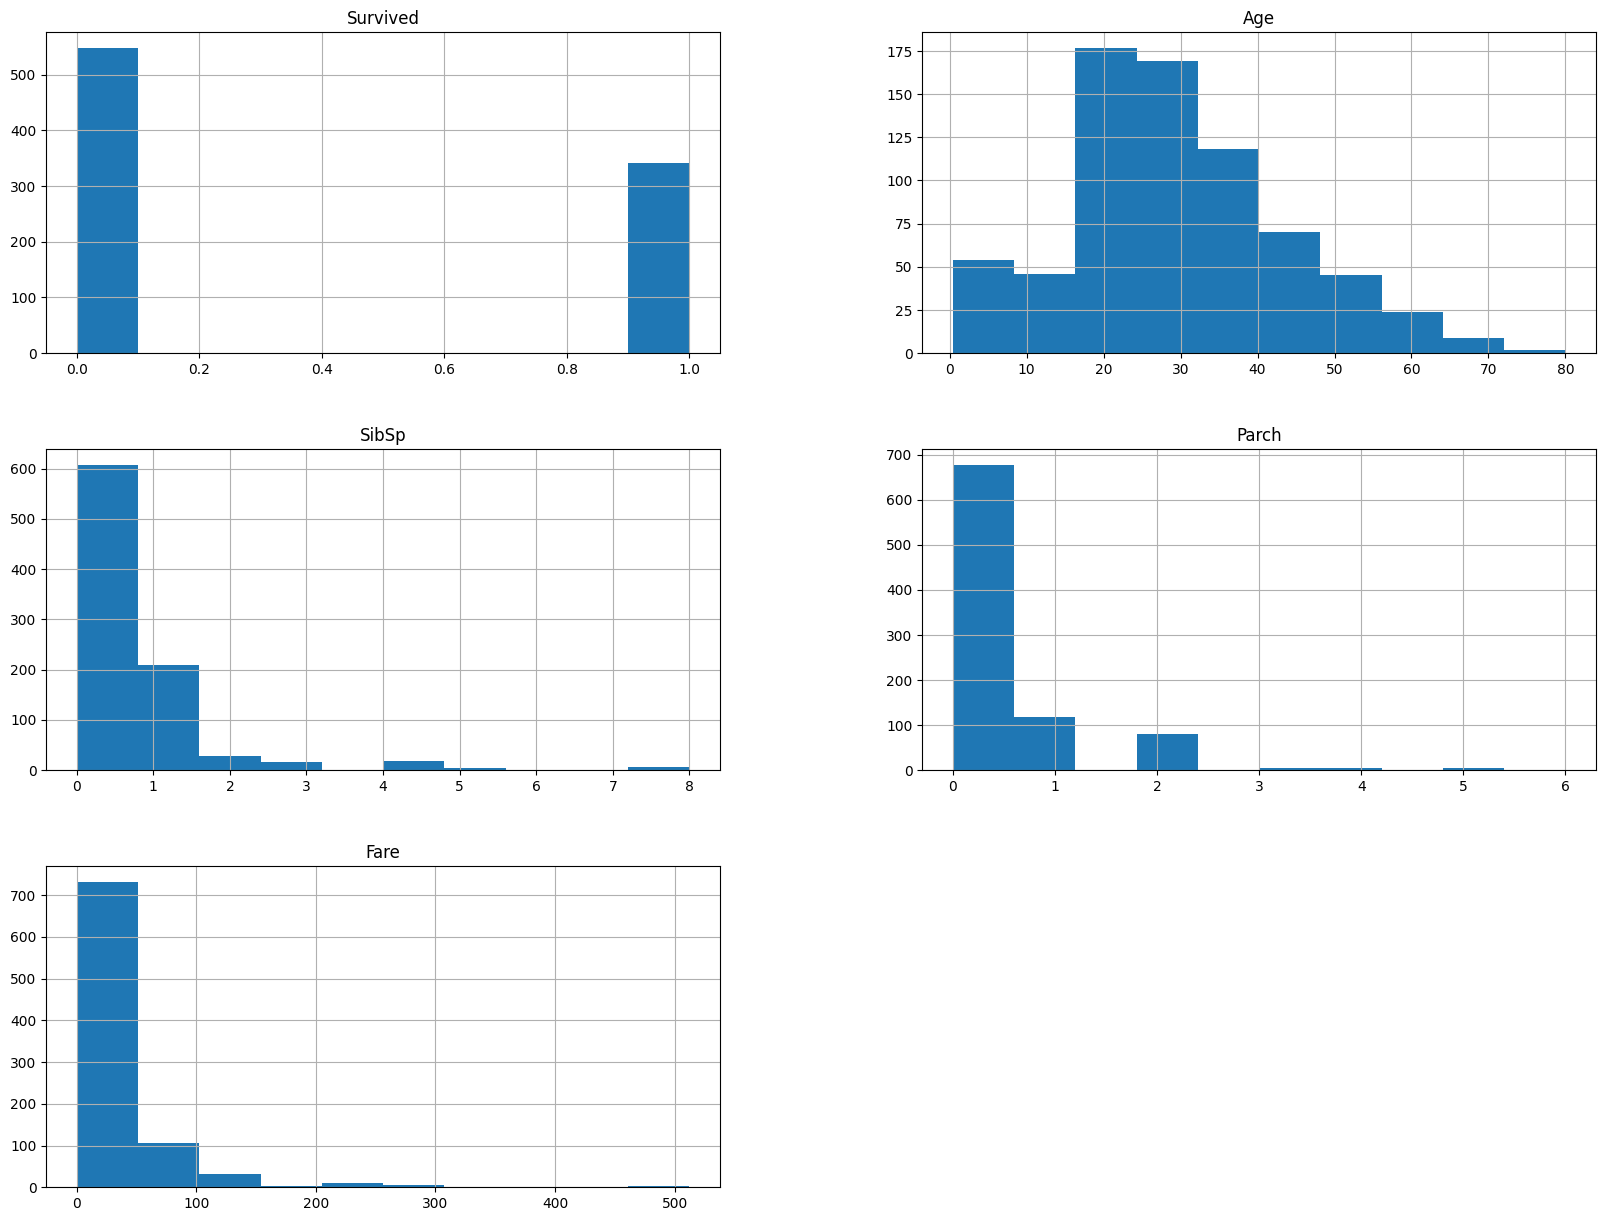

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
hist_data = train_data[["Survived", "Sex", "Age", "SibSp", "Parch", "Fare"]]
hist_data.hist(figsize=(20,15))
#hist_data.Fare[train_data["Fare"] < 20].hist(bins=20,figsize=(20,15))


Insights:
- Age is mostly between 20 and 30
- Fare is mostly has low values (less than 20 dolars

-----------------------------------------------


### Use groupby of Pandas to explain the following questions. Study the examples listed here for groupby and plot functions:
-	https://towardsdatascience.com/pandas-groupby-explained-453692519d0
-	https://medium.com/@sciencelee/making-plots-with-the-pandas-groupby-ac492941af28

For the following examples, use group by and plot for example:
> dataFrame.groupby(‘attribute1’)[‘attribute2’].mean()

> dataFrame.groupby(‘attribute1’)[‘attribute2’].mean().plot(kind=’bar’)


#### Show the average survival rate based on passenger class and sex. Then plot the results.

The following examples use group by and plot for example:

dataFrame.groupby(‘attribute1’)[‘attribute2’].mean()

dataFrame.groupby(‘attribute1’)[‘attribute2’].mean().plot(kind=’bar’)

For more info:
https://towardsdatascience.com/pandas-groupby-explained-453692519d0

https://medium.com/@sciencelee/making-plots-with-the-pandas-groupby-ac492941af28


In [15]:
train_data.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<Axes: xlabel='Pclass'>

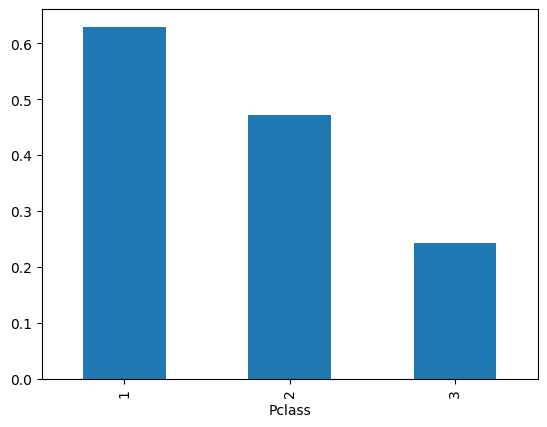

In [16]:
train_data.groupby(['Pclass'])['Survived'].mean().plot(kind='bar')

The insight:
- First class has higher survival rate than second class and second class has higher than third class
----------------------------------

In [17]:
train_data.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<Axes: xlabel='Sex'>

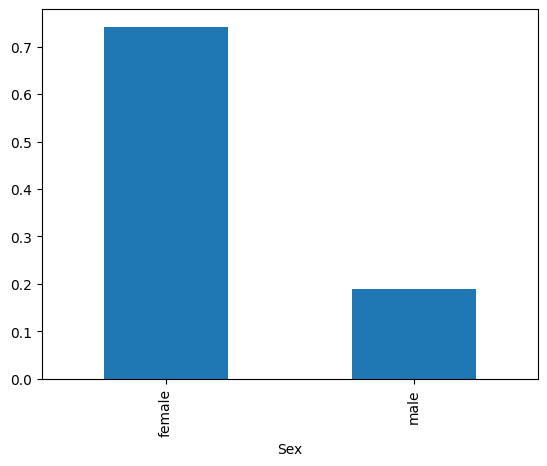

In [18]:
train_data.groupby(['Sex'])['Survived'].mean().plot(kind='bar')

The insight:
- Women have better survival rate than men
----------------------------------

#### Other examples of group by and median:

In [19]:
train_data.groupby(['Pclass','Sex'])['Age'].median() # median age by Pclass, Sex

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [20]:
train_data.groupby(['Pclass','Embarked'])['Fare'].median()

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           24.0000
        Q           12.3500
        S           13.5000
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

-----------------------------

### Process data
- 1) Create a new 'all_data' frame by appending test data to train data. 

- 2) Using pandas methods see and show that some indexes repeat. Find a way to re-organize the index so that they are unique and do not have an extra 'index' column.

- 3) Then check the data using the info() method and list which columns have missing data (other than 'Survived')

In [21]:
all_data = train_data.append(test_data) # important
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


/tmp/ipykernel_23996/3091035193.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = train_data.append(test_data) # important


In [22]:
all_data.tail() # see that last indexes are not the same as passenger id

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [23]:
all_data.index.value_counts()>1  # see that some index values exists more than 1

0       True
314     True
286     True
285     True
284     True
       ...  
571    False
570    False
569    False
568    False
890    False
Length: 891, dtype: bool

##### Re-organize the index so that they are unique and do not have an extra 'index' column.

In [24]:
all_data.reset_index(inplace = True, drop = True) # reset the inde inplace and drop the created extra 'index' column

### Find out that some of the columns are missing data (have null values): 

In [25]:
all_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


Which columns have missing data:
- Age
- Fare
- Cabin
- Embarked

#### Fill missing values of 'Cabin' field with the 'NA' value.

In [26]:
all_data.Cabin = all_data.Cabin.fillna('NA')
all_data.Cabin.fillna('NA', inplace=True)

### Work on missing values on the whole data set

In [27]:
all_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### Fill the missing values of 'Age' field with the median age of the pasenger class and sex using the apply method with lambda function. 


In [28]:
# Fill in missing age information based on the median age for its class and sex.
all_data['Age'] = all_data.groupby(['Pclass','Sex'])['Age'].apply(lambda x : x.fillna(x.median()))

/tmp/ipykernel_23996/4272141461.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  all_data['Age'] = all_data.groupby(['Pclass','Sex'])['Age'].apply(lambda x : x.fillna(x.median()))


In [29]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### Fill missing values of 'Embarked' field with the most frequently seen 'Embarked' value.

In [30]:
# Fill in missing Embarked based on the most frequent Embarked
all_data['Embarked'].fillna(all_data['Embarked'].mode()[0], inplace = True)

In [31]:
all_data.info() # Check if all missing data was filled in

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### Fill missing values of 'Fare' field with the median fare of the pasenger class and embarked location using the apply method with lambda function. 

In [32]:
# Fill in missing fare based on its class and embarked place
all_data['Fare'] = all_data.groupby(['Pclass','Embarked'])['Fare'].apply(lambda x : x.fillna(x.median()))

/tmp/ipykernel_23996/4037061877.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  all_data['Fare'] = all_data.groupby(['Pclass','Embarked'])['Fare'].apply(lambda x : x.fillna(x.median()))


In [33]:
all_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


### Feature Engineering

#### Create a new feature 'Family_Size'
- Create a new feature 'Family_Size' using other features (and also adding the person him/herself to the family size). 
- Then plot a bar chart to show how many of each 'Family_Size' value exists. 
- Finally plot a bar chart to show the relationship between 'Family_Size' and the 'Survival' 

<Axes: >

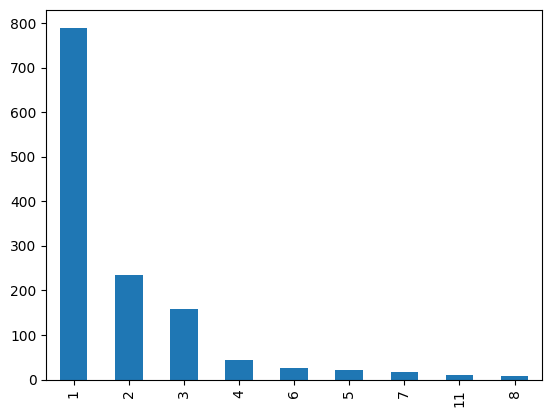

In [34]:
# Create a new feature by adding SibSp, Parch and the person herself. 
all_data['Family_Size'] = all_data['SibSp'] + all_data['Parch'] + 1

all_data['Family_Size'].value_counts().plot(kind='bar')

<Axes: xlabel='Family_Size'>

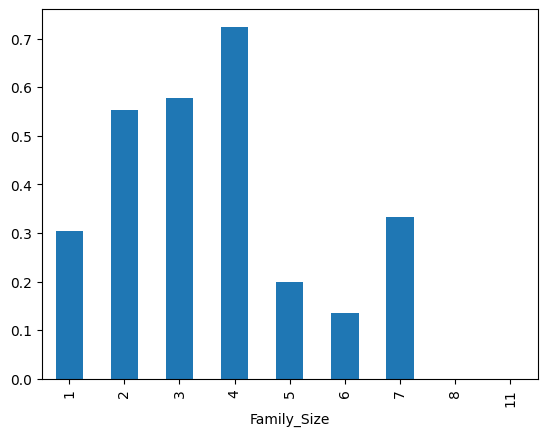

In [35]:
all_data[['Family_Size','Survived']].groupby('Family_Size')['Survived'].mean().plot(kind='bar')

#### Create a new feature 'Fare_Category'
- Use qcut method of Pandas for creating 'Fare_Category' field from Fare so that we have 5 categories of Fare. Note that: 1) With qcut We decompose a distribution so that there are (approximately) the same number of cases ineach category. 2) qcut returns categorical data and we need to convert it to string using astype(str). Otherwise one-hot-encoder question below might have issues.
- Use value_counts() method to show the results. 
- Plot a bar chart to show the relationship between 'Fare_Category' and the 'Survival'

In [36]:
results_categorical = pd.qcut(all_data['Fare'],5)
all_data['Fare_Category'] = pd.Series(results_categorical).astype(str)
all_data['Fare_Category'].value_counts()

(-0.001, 7.854]      275
(21.558, 41.579]     265
(41.579, 512.329]    259
(7.854, 10.5]        255
(10.5, 21.558]       255
Name: Fare_Category, dtype: int64

In [37]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Survived       891 non-null    float64
 2   Pclass         1309 non-null   int64  
 3   Name           1309 non-null   object 
 4   Sex            1309 non-null   object 
 5   Age            1309 non-null   float64
 6   SibSp          1309 non-null   int64  
 7   Parch          1309 non-null   int64  
 8   Ticket         1309 non-null   object 
 9   Fare           1309 non-null   float64
 10  Cabin          1309 non-null   object 
 11  Embarked       1309 non-null   object 
 12  Family_Size    1309 non-null   int64  
 13  Fare_Category  1309 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 143.3+ KB


<Axes: xlabel='Fare_Category'>

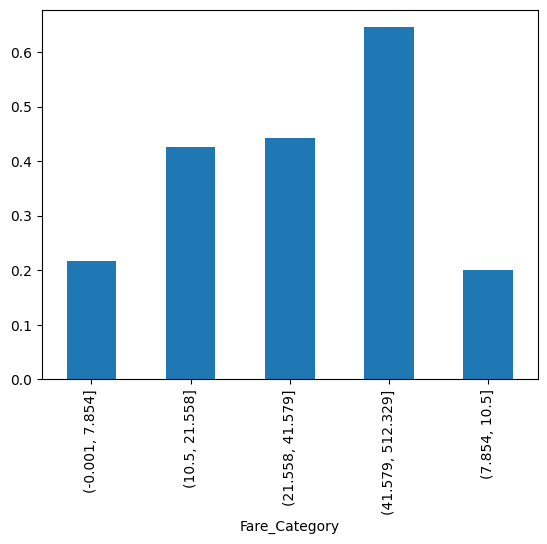

In [38]:
all_data[['Fare_Category','Survived']].groupby('Fare_Category')['Survived'].mean().plot(kind='bar')

#### Create a new feature 'Age_Category'
- Use cut method of Pandas for creating 'Age_Category' field from Age so that we have 5 categories of Age. Note that: 1) With cut, the bins are formed based on the values of the variable, regardless of how many cases fall into a category. 2) cut returns categorical data and we need to convert it to string using astype(str). Otherwise one-hot-encoder question below might have issues.

- Use value_counts() method to show the results. 
- Plot a bar chart to show the relationship between 'Age_Category' and the 'Survival'


In [39]:
results_categorical = pd.cut(all_data['Age'].astype(int),5)
all_data['Age_Category'] = pd.Series(results_categorical).astype(str)
all_data['Age_Category'].value_counts()

(16.0, 32.0]     752
(32.0, 48.0]     304
(-0.08, 16.0]    134
(48.0, 64.0]     106
(64.0, 80.0]      13
Name: Age_Category, dtype: int64

<Axes: xlabel='Age_Category'>

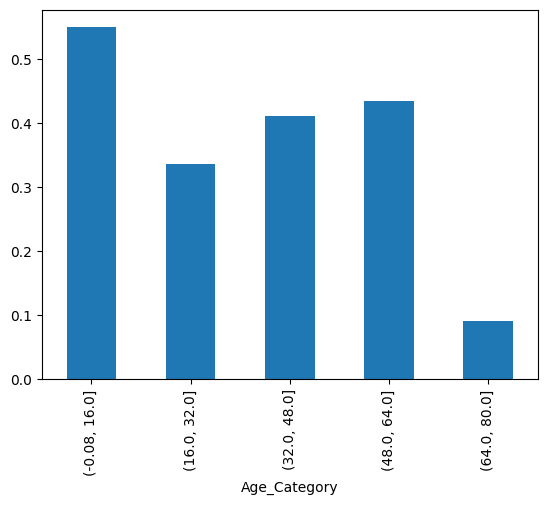

In [40]:
all_data[['Age_Category','Survived']].groupby('Age_Category')['Survived'].mean().plot(kind='bar')

## Answer the rest of the questions below:

### Encoders


#### The following function returns a dataframe with one-hot-encoded columns:
The code is adapted from the following article: 
- https://towardsdatascience.com/machine-learning-with-the-titanic-dataset-7f6909e58280

#### Review the function and add comments to each line to explain it. Show that you understand how it works.

def encode_category_to_numeric(feature,data_frame):

In [85]:
from sklearn.preprocessing import OneHotEncoder #import OHE and Numpy
import numpy as np

def encode_category_to_numeric(feature,data_frame): #functinon def taking a given feature and the dataframe it is from
  encoded_feat = OneHotEncoder().fit_transform(data_frame[feature].values.reshape(-1,1)).toarray() #encodes the given feature with OHE and moves the results into an array whos shape is comptable with the original shape of the feature
  unique_values = data_frame[feature].unique() #filters out unquie values and assigns them 
  sorted_unique_value = np.sort(unique_values) #sorts the unquie values
  cols = ['{}_{}'.format(feature,value) for value in sorted_unique_value] #gets the cols from the sorted unqiue values
  encoded_data = pd.DataFrame(encoded_feat, columns=cols) #puts encoded data into the cols within a dataframe gathered from the previous line
  return encoded_data #return result

#### Create new attributes for the 'Embarked' attribute

In [42]:
encoded_embarked = encode_category_to_numeric("Embarked", all_data)
all_data = pd.concat([all_data, encoded_embarked], axis=1)

#### Create new attributes for the 'Fare_Category' attribute and then concatenate new attributes with the all_data dataframe.

In [43]:
encoded_fare_category = encode_category_to_numeric("Fare_Category", all_data)
all_data = pd.concat([all_data, encoded_fare_category], axis=1)

#### Create new attributes for the 'Age_Category' attribute and then concatenate new attributes with the all_data dataframe.

In [44]:
encoded_age_category = encode_category_to_numeric("Age_Category", all_data)
all_data = pd.concat([all_data, encoded_age_category], axis=1)

#### Create new attributes for the 'Pclass' attribute and then concatenate new attributes with the all_data dataframe.

In [45]:
encoded_pclass = encode_category_to_numeric("Pclass", all_data)
all_data = pd.concat([all_data, encoded_pclass], axis=1)

In [86]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PassengerId                      1309 non-null   int64  
 1   Survived                         891 non-null    float64
 2   Pclass                           1309 non-null   int64  
 3   Name                             1309 non-null   object 
 4   Sex                              1309 non-null   object 
 5   Age                              1309 non-null   float64
 6   SibSp                            1309 non-null   int64  
 7   Parch                            1309 non-null   int64  
 8   Ticket                           1309 non-null   object 
 9   Fare                             1309 non-null   float64
 10  Cabin                            1309 non-null   object 
 11  Embarked                         1309 non-null   object 
 12  Family_Size         

### Using LabelEncoder, create the 'Sex_Numeric' based on the values of the 'Sex' attribute.

In [47]:
from sklearn import preprocessing


le = preprocessing.LabelEncoder()
Sex_Numeric = le.fit_transform(all_data["Sex"])
all_data["Sex_Numeric"] = Sex_Numeric


### Calculate the correlations

In [48]:
corr_matrix = all_data.corr()
corr_matrix["Survived"].sort_values(ascending=False)

/tmp/ipykernel_23996/552797773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = all_data.corr()


Survived                           1.000000
Pclass_1                           0.285904
Fare_Category_(41.579, 512.329]    0.263007
Fare                               0.257307
Embarked_C                         0.168240
Age_Category_(-0.08, 16.0]         0.121485
Pclass_2                           0.093349
Parch                              0.081629
Fare_Category_(21.558, 41.579]     0.062529
Fare_Category_(10.5, 21.558]       0.043153
Age_Category_(32.0, 48.0]          0.032801
Age_Category_(48.0, 64.0]          0.030350
Family_Size                        0.016639
Embarked_Q                         0.003650
PassengerId                       -0.005007
SibSp                             -0.035322
Age                               -0.058635
Age_Category_(64.0, 80.0]         -0.067344
Age_Category_(16.0, 32.0]         -0.106821
Embarked_S                        -0.149683
Fare_Category_(-0.001, 7.854]     -0.171109
Fare_Category_(7.854, 10.5]       -0.191707
Pclass_3                        

### Based on the correlation matrix results, identify some of the features as unimportant and drop them and assign the remaining DataFrame to the variable named 'important_data'. When you drop features, leave at least 10 columns besides 'Survivided' in the 'important_data' DataFrame. After that, check the correlation to 'Survived' as you did before.

In [87]:
important_data = all_data[["Survived", "Pclass_1", "Fare_Category_(41.579, 512.329]", "Fare", "Embarked_C", "Age_Category_(-0.08, 16.0]", "Pclass_2", "Parch", "Fare_Category_(21.558, 41.579]", "Fare_Category_(10.5, 21.558]", "Age_Category_(32.0, 48.0]"]]
important_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Survived                         891 non-null    float64
 1   Pclass_1                         1309 non-null   float64
 2   Fare_Category_(41.579, 512.329]  1309 non-null   float64
 3   Fare                             1309 non-null   float64
 4   Embarked_C                       1309 non-null   float64
 5   Age_Category_(-0.08, 16.0]       1309 non-null   float64
 6   Pclass_2                         1309 non-null   float64
 7   Parch                            1309 non-null   int64  
 8   Fare_Category_(21.558, 41.579]   1309 non-null   float64
 9   Fare_Category_(10.5, 21.558]     1309 non-null   float64
 10  Age_Category_(32.0, 48.0]        1309 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 112.6 KB


In [50]:
important_data.corr()["Survived"].sort_values(ascending=False)


Survived                           1.000000
Pclass_1                           0.285904
Fare_Category_(41.579, 512.329]    0.263007
Fare                               0.257307
Embarked_C                         0.168240
Age_Category_(-0.08, 16.0]         0.121485
Pclass_2                           0.093349
Parch                              0.081629
Fare_Category_(21.558, 41.579]     0.062529
Fare_Category_(10.5, 21.558]       0.043153
Age_Category_(32.0, 48.0]          0.032801
Name: Survived, dtype: float64

### Create X_train, Y_train and X_test DataFrames. Note that X_train should 891 instances and the rest should go to X_test. Drop the 'Survived' from X_test. Check the X_train, X_test and Y_train.

In [51]:
X_train = important_data.drop(columns="Survived").iloc[:891]
X_test = important_data.drop(columns="Survived").iloc[891:]
Y_train = important_data['Survived'].iloc[:891]

In [52]:
X_train

,Pclass_1,"Fare_Category_(41.579, 512.329]",Fare,Embarked_C,"Age_Category_(-0.08, 16.0]",Pclass_2,Parch,"Fare_Category_(21.558, 41.579]","Fare_Category_(10.5, 21.558]","Age_Category_(32.0, 48.0]"
0,0.0,0.0,7.2500,0.0,0.0,0.0,0,0.0,0.0,0.0
1,1.0,1.0,71.2833,1.0,0.0,0.0,0,0.0,0.0,1.0
2,0.0,0.0,7.9250,0.0,0.0,0.0,0,0.0,0.0,0.0
3,1.0,1.0,53.1000,0.0,0.0,0.0,0,0.0,0.0,1.0
4,0.0,0.0,8.0500,0.0,0.0,0.0,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,13.0000,0.0,0.0,1.0,0,0.0,1.0,0.0
887,1.0,0.0,30.0000,0.0,0.0,0.0,0,1.0,0.0,0.0
888,0.0,0.0,23.4500,0.0,0.0,0.0,2,1.0,0.0,0.0
889,1.0,0.0,30.0000,1.0,0.0,0.0,0,1.0,0.0,0.0


In [53]:
X_test

,Pclass_1,"Fare_Category_(41.579, 512.329]",Fare,Embarked_C,"Age_Category_(-0.08, 16.0]",Pclass_2,Parch,"Fare_Category_(21.558, 41.579]","Fare_Category_(10.5, 21.558]","Age_Category_(32.0, 48.0]"
891,0.0,0.0,7.8292,0.0,0.0,0.0,0,0.0,0.0,1.0
892,0.0,0.0,7.0000,0.0,0.0,0.0,0,0.0,0.0,1.0
893,0.0,0.0,9.6875,0.0,0.0,1.0,0,0.0,0.0,0.0
894,0.0,0.0,8.6625,0.0,0.0,0.0,0,0.0,0.0,0.0
895,0.0,0.0,12.2875,0.0,0.0,0.0,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1304,0.0,0.0,8.0500,0.0,0.0,0.0,0,0.0,0.0,0.0
1305,1.0,1.0,108.9000,1.0,0.0,0.0,0,0.0,0.0,1.0
1306,0.0,0.0,7.2500,0.0,0.0,0.0,0,0.0,0.0,1.0
1307,0.0,0.0,8.0500,0.0,0.0,0.0,0,0.0,0.0,0.0


### For each of the algorithms, use Scikit-Learn's cross-validation feature to measure the performance and print out mean and std for each algoritm:

1. Stochastic Gradient Descent (SGD)
2. LogisticRegression
3. Support Vector Machine (kernel='linear' parameter)
4. Support Vector Machine (kernel = 'rbf' parameter)
5. DecisionTreeClassifier
6. RandomForestClassifier
7. ExtraTreesClassifier
8. AdaBoostClassifier
9. GradientBoostingClassifier
10. XGBoost
-- You can import XGBoost library as follows:  "from xgboost import XGBClassifier"
-- You will need to rename the columns to make the XGBoost work

Parameters:
- Set the scoring parameter of cross-validation to 'f1'
- Use the default cv = 5 parameter of cross-validation
- Use random_state = 42 for initializing model algorithms
- Use the kernel parameter indicated above for SVM algorithms
- Use a solver parameter that works for the logistic regression
- For others, use the default parameters (no need to specify explicitly)



In [54]:
X_train = X_train.rename(columns={"Fare_Category_(41.579, 512.329]": "Fare_Category_(41.579 512.329)"})
X_train = X_train.rename(columns={"Age_Category_(-0.08, 16.0]": "Age_Category_(-0.08 16.0)"})
X_train = X_train.rename(columns={"Fare_Category_(21.558, 41.579]": "Fare_Category_(21.558 41.579)"})
X_train = X_train.rename(columns={"Fare_Category_(10.5, 21.558]": "Fare_Category_(10.5 21.558)"})
X_train = X_train.rename(columns={"Age_Category_(32.0, 48.0]": "Age_Category_(32.0 48.0)"})

X_test = X_test.rename(columns={"Fare_Category_(41.579, 512.329]": "Fare_Category_(41.579 512.329)"})
X_test = X_test.rename(columns={"Age_Category_(-0.08, 16.0]": "Age_Category_(-0.08 16.0)"})
X_test = X_test.rename(columns={"Fare_Category_(21.558, 41.579]": "Fare_Category_(21.558 41.579)"})
X_test = X_test.rename(columns={"Fare_Category_(10.5, 21.558]": "Fare_Category_(10.5 21.558)"})
X_test = X_test.rename(columns={"Age_Category_(32.0, 48.0]": "Age_Category_(32.0 48.0)"})



In [55]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd = SGDClassifier(random_state=42)
sgd_cv_scores = cross_val_score(sgd, X_train, Y_train, cv=5, scoring="f1")

sgd_std = np.mean(sgd_cv_scores)
sgd_mean = np.std(sgd_cv_scores)

In [56]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(random_state=42, solver="liblinear")
logr_cv_scores = cross_val_score(logr, X_train, Y_train, cv=5, scoring="f1")

logr_std = np.mean(logr_cv_scores)
logr_mean = np.std(logr_cv_scores)


In [57]:
from sklearn.svm import SVC

svm_lin = SVC(kernel="linear", random_state=42)
svm_lin_cv_scores = cross_val_score(svm_lin, X_train, Y_train, cv=5)

svm_lin_mean = np.mean(svm_lin_cv_scores)
svm_lin_std = np.std(svm_lin_cv_scores)

In [58]:
svm_rbf = SVC(kernel="rbf", random_state=42)
svm_rbf_cv_scores = cross_val_score(svm_rbf, X_train, Y_train, cv=5)

svm_rbf_mean = np.mean(svm_rbf_cv_scores)
svm_rbf_std = np.std(svm_rbf_cv_scores)

In [59]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc_cv_scores = cross_val_score(dtc, X_train, Y_train, cv=5, scoring="f1")

dtc_mean = np.mean(dtc_cv_scores)
dtc_std = np.std(dtc_cv_scores)

In [60]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc_cv_scores = cross_val_score(rfc, X_train, Y_train, cv=5, scoring="f1")

rfc_mean = np.mean(rfc_cv_scores)
rfc_std = np.std(rfc_cv_scores)

In [61]:
from sklearn.tree import ExtraTreeClassifier

etc = ExtraTreeClassifier(random_state=42)
etc_cv_scores = cross_val_score(etc, X_train, Y_train, cv=5, scoring="f1")

etc_mean = np.mean(etc_cv_scores)
etc_std = np.std(etc_cv_scores)

In [62]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(random_state=42)
abc_cv_scores = cross_val_score(abc, X_train, Y_train, cv=5, scoring="f1")

abc_mean = np.mean(abc_cv_scores)
abc_std = np.std(abc_cv_scores)

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42)
gbc_cv_scores = cross_val_score(gbc, X_train, Y_train, cv=5, scoring="f1")

gbc_mean = np.mean(gbc_cv_scores)
gbc_std = np.std(gbc_cv_scores)

In [64]:
X_train

,Pclass_1,Fare_Category_(41.579 512.329),Fare,Embarked_C,Age_Category_(-0.08 16.0),Pclass_2,Parch,Fare_Category_(21.558 41.579),Fare_Category_(10.5 21.558),Age_Category_(32.0 48.0)
0,0.0,0.0,7.2500,0.0,0.0,0.0,0,0.0,0.0,0.0
1,1.0,1.0,71.2833,1.0,0.0,0.0,0,0.0,0.0,1.0
2,0.0,0.0,7.9250,0.0,0.0,0.0,0,0.0,0.0,0.0
3,1.0,1.0,53.1000,0.0,0.0,0.0,0,0.0,0.0,1.0
4,0.0,0.0,8.0500,0.0,0.0,0.0,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,13.0000,0.0,0.0,1.0,0,0.0,1.0,0.0
887,1.0,0.0,30.0000,0.0,0.0,0.0,0,1.0,0.0,0.0
888,0.0,0.0,23.4500,0.0,0.0,0.0,2,1.0,0.0,0.0
889,1.0,0.0,30.0000,1.0,0.0,0.0,0,1.0,0.0,0.0


In [65]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf_cv_scores = cross_val_score(xgb_clf, X_train, Y_train, cv=5, scoring="f1")

xgb_clf_mean = np.mean(xgb_clf_cv_scores)
xgb_clf_std = np.std(xgb_clf_cv_scores)

In [66]:
print("Stochastic Gradient Descent (SGD): " + str(sgd_mean) + " - "  + str(sgd_std))
print("LogisticRegression: " + str(logr_mean) + " - " + str(logr_std))
print("Support Vector Machine (kernel='linear' parameter): " + str(svm_lin_mean) + " - " + str(svm_lin_std))
print("Support Vector Machine (kernel = 'rbf' parameter): " + str(svm_rbf_mean) + " - " + str(svm_rbf_std))
print("DecisionTreeClassifier: " + str(dtc_mean) + " - "  + str(dtc_std))
print("RandomForestClassifier: " + str(rfc_mean) + " - "  + str(rfc_std))
print("ExtraTreesClassifier: " + str(etc_mean) + " - "  + str(etc_std))
print("AdaBoostClassifier: " + str(abc_mean) + " - "  + str(abc_std))
print("GradientBoostingClassifier: " + str(gbc_mean) + " - "  + str(gbc_std))
print("XGBoost: " + str(xgb_clf_mean) + " - "  + str(xgb_clf_std))

#wow that is yucky looking huh 0.o

Stochastic Gradient Descent (SGD): 0.27826816617068767 - 0.32378554778554774
LogisticRegression: 0.10691436309142201 - 0.5282313716672686
Support Vector Machine (kernel='linear' parameter): 0.6712635741635804 - 0.05261551915441239
Support Vector Machine (kernel = 'rbf' parameter): 0.6667629150712447 - 0.04579722211353884
DecisionTreeClassifier: 0.5240268373706152 - 0.03480581002500377
RandomForestClassifier: 0.5580003852618388 - 0.0649117844877872
ExtraTreesClassifier: 0.527697054252512 - 0.047413977929874465
AdaBoostClassifier: 0.5325756251036834 - 0.0591476770078888
GradientBoostingClassifier: 0.5714047974013793 - 0.047793637915785156
XGBoost: 0.5634273768346348 - 0.06064694275468078


### Select the top 3 best performing classifiers. List them along with their mean and std scores. For these top 3 best performing classifiers, find the best hyperparameters using GridSearchCV.


- Use estimator.get_params().keys() or the API description of the classifiers to find out which hyperparameters you can use. 
- Use the same scoring parameter ('f1') and use cv = 10 this time. 
- Print out the best_estimator_ and best_score_ results of your Grid Search
- Use the following hyparparameter options if they fit for your top 3 classifiers:

n_estimators = [300, 400, 500]

learning_rate = [0.3, 0.1, 0.05]

max_features =  [1, 0.5, 0.3]

subsample = [1, 0.5, 0.3]

max_samples = [1, 0.5, 0.3]

bootstrap = [True,False]

The following classifiers are selected because of their high performance:

random_forest_classifier: 
- mean():  xxx
- std():  yyy

gradient_boosting_classifier: 
- mean():  xx
- std():  yy

XGB_classifier: 
- mean():  x
- std():  y

In [88]:
from sklearn.model_selection import GridSearchCV

gbc_hyper = {
    "n_estimators": [300, 400, 500],
    "learning_rate": [0.3, 0.1, 0.05],
    "max_features": [1, 0.5, 0.3],
    "subsample": [1, 0.5, 0.3]}

rfc_hyper = {
    "n_estimators": [300, 400, 500],
    "max_features": [1, 0.5, 0.3],
    "bootstrap": [True, False],
    "max_samples": [1, 0.5, 0.3]}

xgb_hyper = {
    "n_estimators": [300, 400, 500],
    "learning_rate": [0.3, 0.1, 0.05],
    "subsample": [1, 0.5, 0.3]}

classifiers_list = [
    (GradientBoostingClassifier(random_state=42), gbc_hyper),
    (RandomForestClassifier(random_state=42), rfc_hyper),
    (xgb.XGBClassifier(random_state=42), xgb_hyper)]

best_list = []

for classifiers, paramters in classifiers_list:
    grid_search = GridSearchCV(classifiers, paramters, scoring="f1", cv=10, n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    
    print(f"Best estimator for {classifiers.__class__.__name__}:")
    print(grid_search.best_estimator_)
    best_list.append(grid_search.best_estimator_)
    print("Best score: " + str(grid_search.best_score_) + "\n")



Best estimator for GradientBoostingClassifier:
GradientBoostingClassifier(max_features=1, n_estimators=400, random_state=42,
                           subsample=1)
Best score: 0.5894459516416413



/home/jiffy/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
270 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jiffy/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jiffy/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 397, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

  warnings.warn(some_fits_failed_message, FitFaile

Best estimator for RandomForestClassifier:
RandomForestClassifier(max_features=1, max_samples=0.5, n_estimators=500,
                       random_state=42)
Best score: 0.58685467441644

Best estimator for XGBClassifier:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)
Best score: 0.575948924926045

### Use the VotingClassifier you created above to predict 'Survived' for the X_test.

In [ ]:
from sklearn.ensemble import VotingClassifier

VotingPredictor = VotingClassifier(estimators =
                           [('gbc', best_list[0]),
                            ('rfc', best_list[1]), 
                            ('xgb', best_list[2])],
                           voting='soft', n_jobs = -1)

VotingPredictor = VotingPredictor.fit(X_train, Y_train)


voting_scores = cross_val_score(VotingPredictor, X_train, Y_train, cv = 10, n_jobs = -1)
print(voting_scores.mean())
print(voting_scores.std())

In [84]:
from numpy import random


TestPassengerID = test_data['PassengerId']

Predictive_Model = pd.DataFrame({
        "PassengerId": TestPassengerID,
        "Survived": VotingPredictor.predict(X_test)})

Predictive_Model.to_csv('titanic_model_predictions.csv', index=False)

### Prepare a csv file to submit to kaggle.com. Submit it and then put your results here.